### This jupyter notebook is a solution to the kaggle competition of space titanic where we have to predict which passengers gets transported to different dimension based on a set of variables.

In [105]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [106]:
# Loading the training dataset
train = pd.read_csv('train.csv')

In [107]:
# Loading the test dataset
test = pd.read_csv('test.csv')

In [108]:
# Loading the submissions dataset
submissions = pd.read_csv('sample_submission.csv')

In [109]:
# Having a look at the train dataset
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [110]:
# Having a look at the test dataset
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [111]:
# Checking the shape of the train dataset
train.shape

(8693, 14)

In [112]:
# Checking the shape of the test dataset
test.shape

(4277, 13)

In [113]:
# Checking names of all columns in the train data
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [114]:
# Checking names of all columns in the test data
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [115]:
# We observe that in the test dataset the transported column is missing which is our target variable

In [116]:
# Getting basic information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [117]:
# Getting basic informatio about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [118]:
# Analysing our target variable which is the transported column
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [119]:
# We observe that more people were transported than not

<AxesSubplot:xlabel='Transported', ylabel='count'>

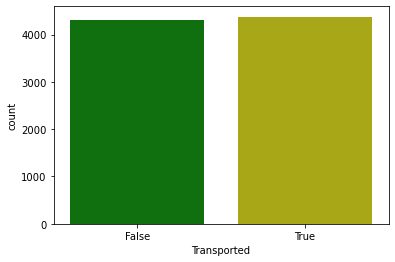

In [120]:
# Plotting a countplot to observe the transported column
sns.countplot(x = 'Transported', data = train, palette = ['g','y'])

In [121]:
# Analysing the VIP column
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

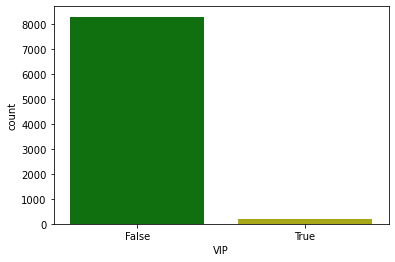

In [122]:
# Plotting a countplot to observe the VIP column
sns.countplot(x = 'VIP', data = train, palette = ['g','y'])

In [123]:
# Creating a new feature of passengers who were not transported
train['Not_transported'] = 1 - train['Transported']

<AxesSubplot:xlabel='VIP'>

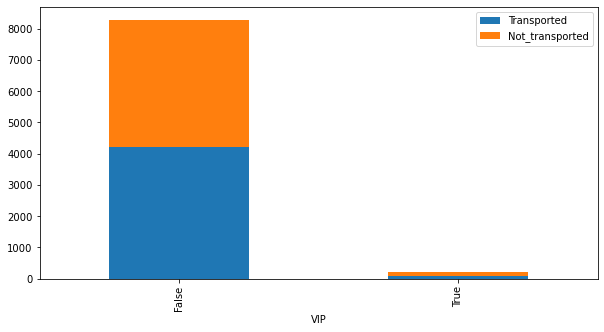

In [124]:
# Visualizing transported passengers based on the VIP column
train.groupby('VIP').agg('sum')[['Transported','Not_transported']].plot(kind = 'bar', figsize = (10,5), stacked = True)

In [125]:
# We observe that transportation does not have much correlation to VIP package

## Data Cleaning

In [126]:
# Checking for null values in the dataset
train.isnull().sum().sort_values(ascending = False)

CryoSleep          217
ShoppingMall       208
VIP                203
HomePlanet         201
Name               200
Cabin              199
VRDeck             188
FoodCourt          183
Spa                183
Destination        182
RoomService        181
Age                179
PassengerId          0
Transported          0
Not_transported      0
dtype: int64

In [127]:
# Filling null values with mean in numerical columns
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')
train['Age']=train['Age'].fillna(train['Age'].mean())
train['RoomService'] = pd.to_numeric(train['RoomService'], errors='coerce')
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt'] = pd.to_numeric(train['FoodCourt'], errors='coerce')
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall'] = pd.to_numeric(train['ShoppingMall'], errors='coerce')
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa'] = pd.to_numeric(train['Spa'], errors='coerce')
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck'] = pd.to_numeric(train['VRDeck'], errors='coerce')
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())

In [128]:
# Filling null values with mode in categorical columns
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])
train['VIP'] = train['VIP'].fillna(train['VIP'].mode()[0])
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Name'] = train['Name'].fillna(train['Cabin'].mode()[0])

In [129]:
# Checking for any remaining null values in the dataset
train.isnull().sum().sort_values(ascending = False)

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported        0
Not_transported    0
dtype: int64

In [130]:
# We observe that there are no null values left in the dataset 

## Feature Engineering 

In [131]:
# Checking all the unique values of Cabin column
train['Cabin'].value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [132]:
# In this data P: Portside and S: Starboard side

In [133]:
# Splitting the data to only get the valuable information i.e P or S
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

In [134]:
# Checking the unique values of the new Cabin side column
train['Cabin_side'].unique()

array(['P', 'S'], dtype=object)

In [135]:
# Making a copy of the train dataset
df1 = train

In [136]:
# Checking the new dataset
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Not_transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,S


In [137]:
# Converting categorical data to numerical data
df1['HomePlanet'] = df1['HomePlanet'].map({'Europa':0, 'Earth':1, 'Mars':2})
df1['Cabin_side'] = df1['Cabin_side'].map({'P':0, 'S':1})
df1['Destination'] = df1['Destination'].map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [138]:
# Converting boolean data to numerical data
df1["CryoSleep"].replace(False,0,inplace=True)
df1["CryoSleep"].replace(True,1,inplace=True)
df1["VIP"].replace(False,0,inplace=True)
df1["VIP"].replace(True,1,inplace=True)
df1["Transported"].replace(False,0,inplace=True)
df1["Transported"].replace(True,1,inplace=True)

In [139]:
# Dropping the unwanted columns
df1 = train.drop(['Name', 'Cabin', 'Not_transported'], axis = 1)

In [140]:
# Looking at our dataset again
df1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1


In [141]:
# Getting some information about the dataset
df1.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.957207,0.349362,0.505694,28.827930,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,0.516162
std,0.667613,0.476796,0.814966,14.339054,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000


<AxesSubplot:>

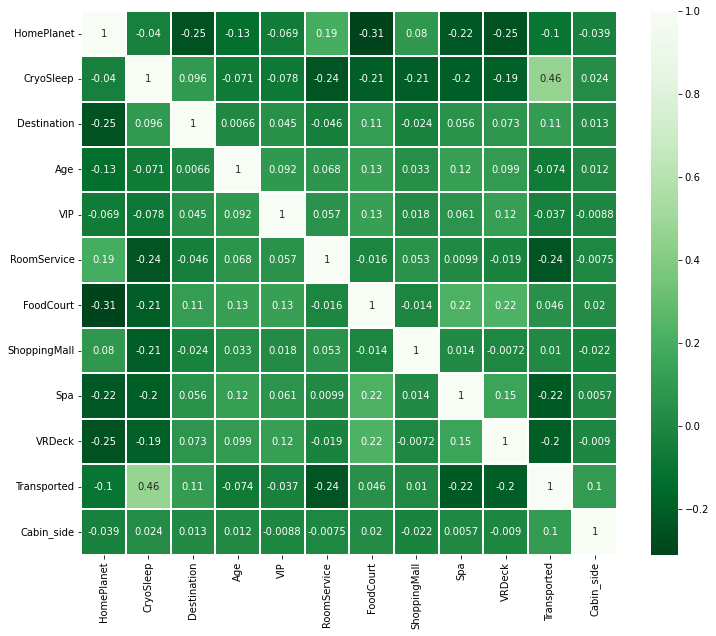

In [142]:
# Plotting the correlation heatmap
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr(), annot = True, linewidth = 0.4, cmap = 'Greens_r')

In [143]:
# Checking for null values
df1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_side      0
dtype: int64

## Model Building

In [144]:
# Splitting the data
X = df1.drop(['Transported'], axis = 1)
y = df1['Transported']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [145]:
# Checking the shape of the trainin gand validation data
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6954, 12)
(1739, 12)
(6954,)
(1739,)


## K Nearest Neighbor

In [146]:
# Importing the library
from sklearn.neighbors import KNeighborsClassifier

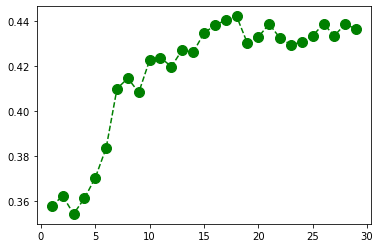

In [147]:
# Finding the value with least error
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))
    
plt.plot(range(1,30), error, color = 'green', linestyle = '--', marker = 'o', markersize = 10, markerfacecolor = 'g')

In [148]:
# We observe that K value of 3 shows the lowest mean error

In [149]:
# Making new model with K value of 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [150]:
# Predicting the results
pred1 = knn.predict(X_val)

In [151]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_val, pred1)
print('KNN Classifier Accuracy:', round(a1,4)*100, '%')

KNN Classifier Accuracy: 64.58 %


## AdaBoost Classifier

In [152]:
# Importing the library
from sklearn.ensemble import AdaBoostClassifier

In [153]:
# Defining the model
adbc = AdaBoostClassifier(n_estimators = 115, learning_rate = 0.412, random_state = 42)
adbc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.412, n_estimators=115, random_state=42)

In [154]:
# Predicting the results
pred2 = adbc.predict(X_val)

In [155]:
# Checking the accuracy
a2 = accuracy_score(y_val,pred2)
print("AdaBoost Classifier Accuracy : ", round(accuracy_score(y_val,pred2),4)*100, '%')

AdaBoost Classifier Accuracy :  78.61 %


## Gaussian Naive Bayes

In [156]:
# Importing the library
from sklearn.naive_bayes import GaussianNB

In [157]:
# Defining the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [158]:
# Predicting the results
pred3 = gnb.predict(X_val)

In [159]:
# Checking the accuracy
a3 = accuracy_score(y_val,pred3)
print("Gaussian Naive Bayes Accuracy : ", round(accuracy_score(y_val,pred3),4)*100, '%')

Gaussian Naive Bayes Accuracy :  65.84 %


## Decision Tree Classifier

In [160]:
# Importing the library
from sklearn.tree import DecisionTreeClassifier

In [161]:
# Defining the model
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [162]:
# Predicting the results
pred4 = dtc.predict(X_val)

In [163]:
# Checking the accuracy
a4 = accuracy_score(y_val, pred4)
print("Decision Tree Classifier Accuracy : ", round(accuracy_score(y_val,pred4),4)*100, '%')

Decision Tree Classifier Accuracy :  73.03 %


## Multinomial Naive Bayes

In [164]:
# Importing the library
from sklearn.naive_bayes import MultinomialNB

In [165]:
# Defining the model
mnnb = MultinomialNB()
mnnb.fit(X_train,y_train)

MultinomialNB()

In [166]:
# Predicting the results
pred5 = mnnb.predict(X_val)

In [167]:
# Checking the accuracy
a5 = accuracy_score(y_val,pred5)
print("Accuracy Multinomial Naive Bayes : ", round(accuracy_score(y_val,pred5),4)*100, '%')

Accuracy Multinomial Naive Bayes :  72.28 %


## Support Vector Classifier

In [168]:
# Importing the library
from sklearn.svm import SVC

In [169]:
# Defining the model
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [170]:
# Predicting the results
pred6 = svc.predict(X_val)

In [171]:
# Checking the accuracy
a6 = accuracy_score(y_val, pred6)
print("Accuracy Support Vector Classifier : ", round(accuracy_score(y_val,pred6),1)*100, '%')

Accuracy Support Vector Classifier :  60.0 %


## Random Forest Classifier

In [172]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

In [208]:
# Defining the model
rfc = RandomForestClassifier(n_estimators = 600, max_depth = 18, random_state = 42, min_samples_leaf = 4)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=4, n_estimators=700,
                       random_state=42)

In [209]:
# Predicting the results
pred7 = rfc.predict(X_val)

In [210]:
# Checking the accuracy
a7=accuracy_score(y_val,pred7)
print("Accuracy Random Forest Classifier : ",round(accuracy_score(y_val,pred7),4)*100, '%')

Accuracy Random Forest Classifier :  80.16 %


## Multi-layer Perceptron classifier

In [176]:
# Importing the library
from sklearn.neural_network import MLPClassifier

In [177]:
# Defining the model
mlp= MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [178]:
# Predicting the results
pred8 = mlp.predict(X_val)

In [179]:
# Checking the accuracy
a8 = accuracy_score(y_val, pred8)
print("Accuracy Multi-layer Perceptron classifier : ", round(accuracy_score(y_val,pred8),4)*100, '%')

Accuracy Multi-layer Perceptron classifier :  51.81 %


## Gradient Boosting

In [180]:
# Importing the library
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
# Defining the model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [182]:
# Predicting the results
pred9=gbc.predict(X_val)

In [183]:
# Checking the accuracy
a9=accuracy_score(y_val,pred9)
print("Accuracy Gradient Boosting : ",round(accuracy_score(y_val,pred9),4)*100, '%')

Accuracy Gradient Boosting :  79.53 %


## Logistic Regression

In [184]:
# Importing the library
from sklearn.linear_model import LogisticRegression

In [185]:
# Defining the model
lg= LogisticRegression(random_state=0)
lg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [186]:
# Predicting the results
pred10=gbc.predict(X_val)

In [187]:
# Checking the accuracy
a10=accuracy_score(y_val,pred10)
print("Accuracy Logistic Regression : ",round(accuracy_score(y_val,pred10),4)*100, '%')

Accuracy Logistic Regression :  79.53 %


## Model Comparision

In [188]:
# Comparing all the models to find the model with highest acuracy
models = ['K Nearest Neighbor','AdaBoost Classifier','Gaussian Naive Bayes','Decision Tree Classifier','Multinomial Naive Bayes','Support Vector Classifier','Random Forest Classifier','Multi-layer Perceptron classifier','Gradient Boosting','Logistic Regression']
acc = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
data = {'Models':['K Nearest Neighbor','AdaBoost Classifier','Gaussian Naive Bayes','Decision Tree Classifier','Multinomial Naive Bayes', 'Support Vector Classifier','Random Forest Classifier','Multi-layer Perceptron classifier','Gradient Boosting','Logistic Regression'],
      'Accuracy':[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]}
pd.DataFrame(data).style.background_gradient(cmap='Blues')

,Models,Accuracy
0,K Nearest Neighbor,0.645773
1,AdaBoost Classifier,0.786084
2,Gaussian Naive Bayes,0.658424
3,Decision Tree Classifier,0.730305
4,Multinomial Naive Bayes,0.722829
5,Support Vector Classifier,0.550891
6,Random Forest Classifier,0.800460
7,Multi-layer Perceptron classifier,0.518114
8,Gradient Boosting,0.795285
9,Logistic Regression,0.795285


<AxesSubplot:title={'center':'Comparing Models'}, xlabel='Accuracy'>

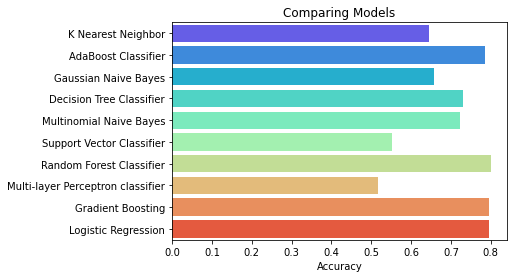

In [189]:
# Visualizing the accuracy  of the models
plt.title('Comparing Models')
plt.xlabel('Accuracy')
sns.barplot(x = acc, y = models, palette='rainbow')

In [190]:
# We observe that Random Forest Classifier is the best model with highest accuracy

## Test data exploration

In [191]:
# Having a look at the test dataset
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [192]:
# Checking the shape of test dataset
test.shape

(4277, 13)

In [193]:
# Checking for null values in the test dataset
test.isnull().sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [194]:
# Filling null values with mean in numerical columns
test['Age'] = pd.to_numeric(test['Age'], errors='coerce')
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['RoomService'] = pd.to_numeric(test['RoomService'], errors='coerce')
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = pd.to_numeric(test['FoodCourt'], errors='coerce')
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = pd.to_numeric(test['ShoppingMall'], errors='coerce')
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa'] = pd.to_numeric(test['Spa'], errors='coerce')
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())
test['VRDeck'] = pd.to_numeric(test['VRDeck'], errors='coerce')
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())

In [195]:
# Filling null values with mode in categorical columns
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])

In [196]:
# Splitting the data to only get the valuable information i.e P or S
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

In [197]:
# Checking for unique values in the Cabin side variable
test['Cabin_side'].unique()

array(['S', 'P'], dtype=object)

In [198]:
# Converting categorical feature into numerical feature
test.HomePlanet=test.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
test.Cabin_side=test.Cabin_side.map({'P':0,'S':1})
test.Destination=test.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [199]:
# Replacing boolean values with numerical values
test["CryoSleep"].replace(False,0,inplace=True)
test["CryoSleep"].replace(True,1,inplace=True)
test["VIP"].replace(False,0,inplace=True)
test["VIP"].replace(True,1,inplace=True)

In [200]:
# Droping unwanted columns
test_df = test.drop(['Name','Cabin'],axis=1)

In [201]:
# Looking at the final dataset
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
0,0013_01,1,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0018_01,1,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1
2,0019_01,0,1,2,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,0021_01,0,0,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0023_01,1,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1


In [202]:
# Checking for null values
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_side      0
dtype: int64

In [203]:
# Final prediction using the Random Forest Classifier
pred_final = rfc.predict(test_df)

In [204]:
# Converting the Passenger ID and Final predictions into a dataframe
a = test_df['PassengerId']
x = pd.DataFrame(a)
b = pred_final
y = pd.DataFrame(b)

In [205]:
# Creating the final dataframe
final = pd.concat([x,y],axis=1)
final.replace(0,False,inplace=True)
final.replace(1,True,inplace=True)
final.rename(columns={0:'Transported'},inplace=True)
final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [206]:
# Converting the results into a csv file
final.to_csv('spaceship_titanic.csv',index=False)

<AxesSubplot:xlabel='Transported', ylabel='count'>

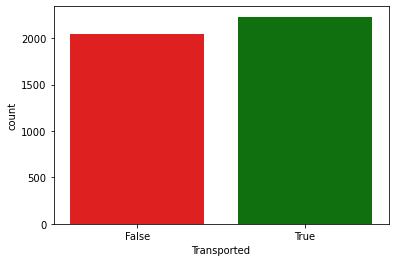

In [207]:
# Visualizing predicted values
sns.countplot(x='Transported',data=final,palette=['r','g'])